In [1]:

# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_openml
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Hashing Encoding is a technique used to convert categorical variables into a fixed-size numerical format.
# It's particularly useful when dealing with high-cardinality features (features with many unique values),
# as it doesn't create a new column for each category like one-hot encoding does.

# When to use Hashing Encoding:
# 1. High-Cardinality Categorical Features: When you have features with thousands or millions of unique categories (e.g., user IDs, zip codes).
# 2. Memory Constraints: It's memory-efficient because you can control the output dimension.
# 3. Online Learning: It can handle new categories that appear in streaming data without retraining.

# Requirements for the data:
# - The input feature(s) should be categorical (e.g., strings or objects).
# - It does not require you to know all possible categories beforehand.


In [3]:
# Load a sample dataset
# We'll use the Ames Housing dataset, which has several categorical features.
# The fetch_openml function can be slow, so be patient.
print("Loading Ames Housing dataset...")
try:
    housing = fetch_openml(name="house_prices", as_frame=True, parser='auto')
    df = housing.frame
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Could not load dataset. Error: {e}")
    # As a fallback, create a sample DataFrame
    data = {'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer'],
            'SalePrice': [208500, 181500, 223500, 310000, 257500, 214000, 307000, 200000, 129900, 118000]}
    df = pd.DataFrame(data)
    print("Using a fallback sample DataFrame.")





Loading Ames Housing dataset...
Dataset loaded successfully.


In [4]:
# Select a feature to work with
# 'Neighborhood' is a good example of a categorical feature with multiple unique values.
feature_to_encode = 'Neighborhood'
print(f"\nOriginal unique values in '{feature_to_encode}':")
print(df[feature_to_encode].unique())
print(f"\nNumber of unique values: {df[feature_to_encode].nunique()}")




Original unique values in 'Neighborhood':
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Number of unique values: 25


In [5]:
# --- Hashing Encoding ---
# We will apply Hashing Encoding to the 'Neighborhood' column.
# The `n_components` parameter determines the number of new columns (hash buckets) to create.
# A higher number reduces the chance of "collisions" (different categories hashing to the same value)
# but increases dimensionality. A common choice is a power of 2.
hashing_encoder = ce.HashingEncoder(n_components=8, cols=[feature_to_encode])

# Apply the encoder to the DataFrame
# The transform method returns a new DataFrame with the hashed features.
df_hashed = hashing_encoder.fit_transform(df[feature_to_encode])



In [6]:
# The new column names are typically 'col_0', 'col_1', etc.
# We can rename them for clarity.
df_hashed = df_hashed.rename(columns={f'col_{i}': f'hash_{feature_to_encode}_{i}' for i in range(8)})

# Concatenate the new hashed features with the original DataFrame
df_final = pd.concat([df, df_hashed], axis=1)




DataFrame head with original 'Neighborhood' column:
  Neighborhood
0      CollgCr
1      Veenker
2      CollgCr
3      Crawfor
4      NoRidge

DataFrame head with the new hashed features for 'Neighborhood':
   hash_Neighborhood_0  hash_Neighborhood_1  hash_Neighborhood_2  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    0                    1   
3                    0                    0                    0   
4                    0                    0                    0   

   hash_Neighborhood_3  hash_Neighborhood_4  hash_Neighborhood_5  \
0                    0                    0                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    1                    0                    0   
4                    0                    0

C:\Users\basde\AppData\Local\Temp\ipykernel_11600\3032551086.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_hashed, ax=axes[i], palette='viridis')
C:\Users\basde\AppData\Local\Temp\ipykernel_11600\3032551086.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_hashed, ax=axes[i], palette='viridis')
C:\Users\basde\AppData\Local\Temp\ipykernel_11600\3032551086.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_hashed, ax=axes[i], palette='viridis')
C:\Users\basde\AppData\Local\Temp\ipy

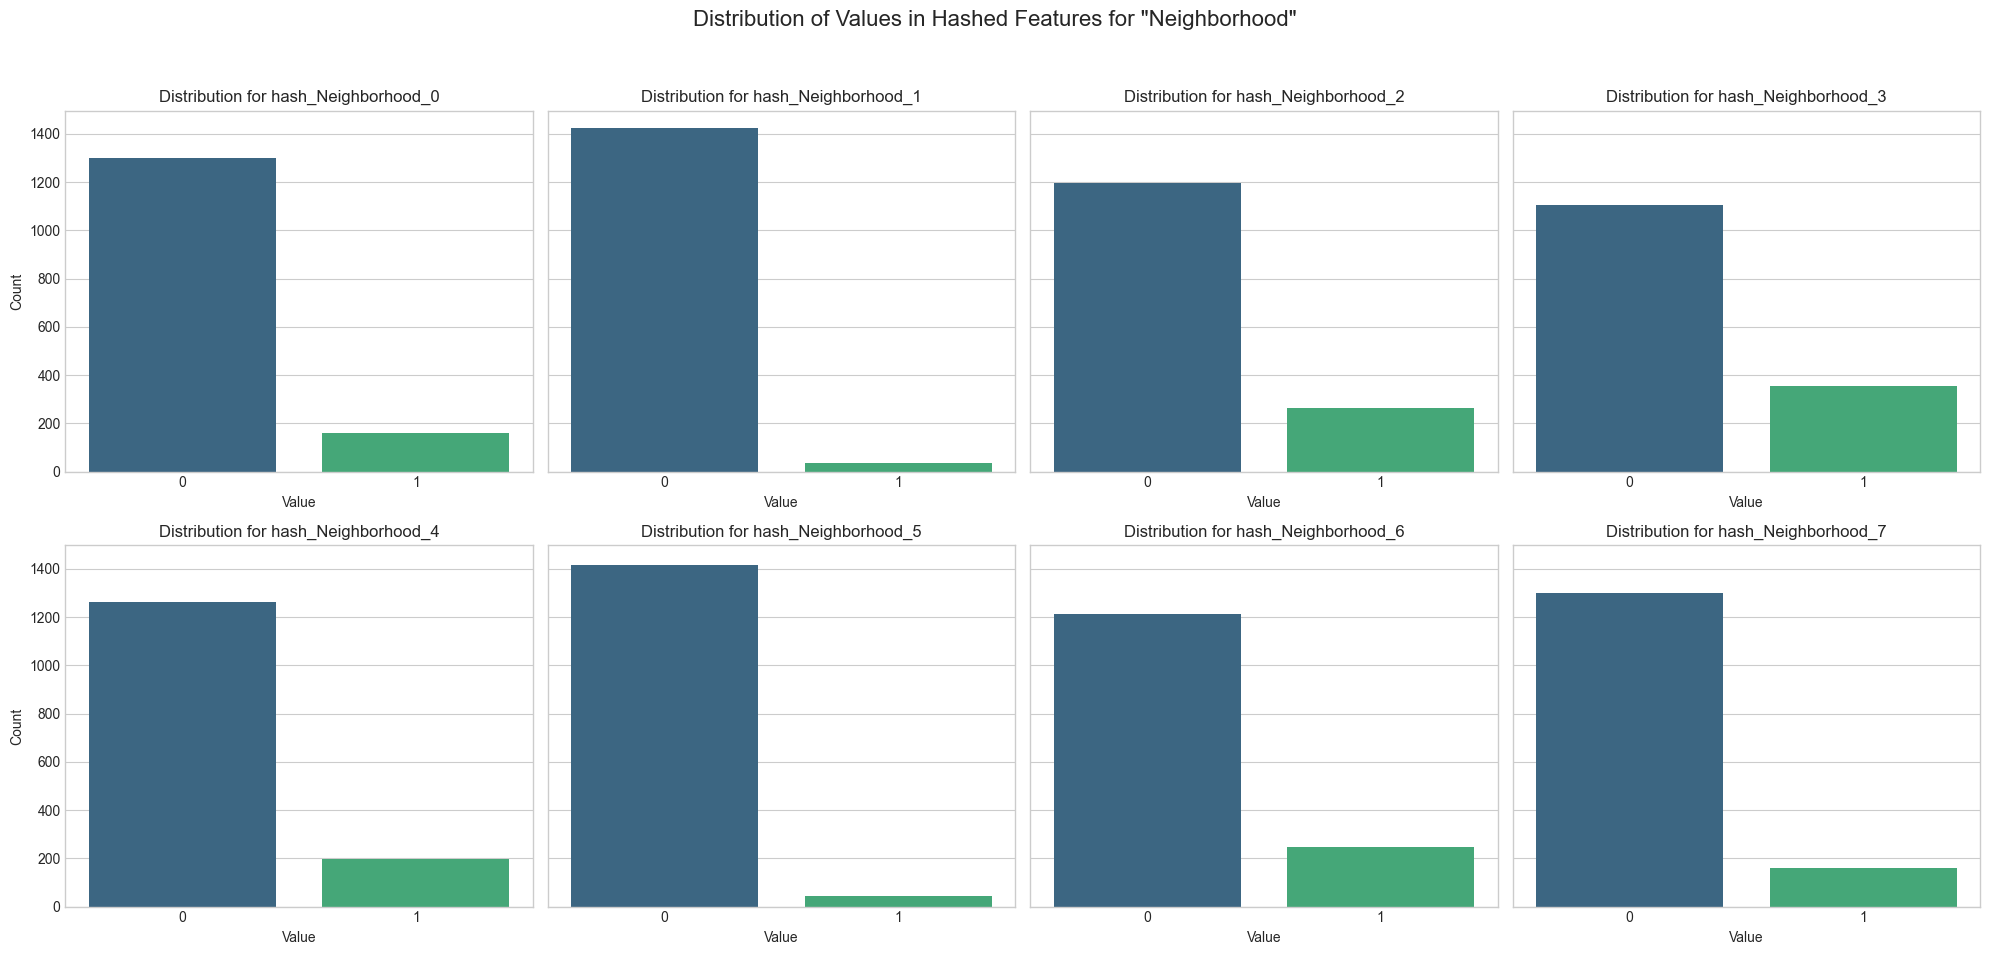

In [7]:
# --- Show the result ---
print("\nDataFrame head with original 'Neighborhood' column:")
print(df[[feature_to_encode]].head())

print(f"\nDataFrame head with the new hashed features for '{feature_to_encode}':")
print(df_hashed.head())

print("\nFinal DataFrame head with both original and hashed features:")
print(df_final[[feature_to_encode] + list(df_hashed.columns)].head())

# --- Visualization ---
# It's difficult to create a direct "before and after" visualization for hashing like you can for scaling.
# Hashing transforms one column of categories into multiple numerical columns.
# We can, however, visualize the distribution of values within the new hash features.
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
axes = axes.flatten()
fig.suptitle(f'Distribution of Values in Hashed Features for "{feature_to_encode}"', fontsize=16)

for i, col in enumerate(df_hashed.columns):
    sns.countplot(x=col, data=df_hashed, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution for {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()